# <span style='color:Blue'> Lenovo's New Smartphone Review Analysis | Simplilearn  </span>

##  <div style="text-align: right"> - Sarvani Nandipati </div>

### Description:

Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

### Problem Statement: 

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

**Domain:** Amazon reviews for a leading phone brand

**Analysis to be done:** POS tagging, topic modeling using LDA, and topic interpretation

**Content:**

**Dataset:** ‘K8 Reviews v0.2.csv’

**Columns:**

**Sentiment:** The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)

**Reviews:** The main text of the review

### Steps to perform:

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.

Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

**Tasks:**

1. Read the .csv file using Pandas. Take a look at the top few records.

2. Normalize casings for the review text and extract the text into a list for easier manipulation.

3. Tokenize the reviews using NLTKs word_tokenize function.

4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

5. For the topic model, we should  want to include only nouns.

    1. Find out all the POS tags that correspond to nouns.

    2. Limit the data to only terms with these tags.

6. Lemmatize. 

    1. Different forms of the terms need to be treated as one.

    2. No need to provide POS tag to lemmatizer for now.

7. Remove stopwords and punctuation (if there are any). 

8. Create a topic model using LDA on the cleaned-up data with 12 topics.

    1. Print out the top terms for each topic.

    2. What is the coherence of the model with the u_mass metric?

9. Analyze the topics through the business lens.

    1. Determine which of the topics can be combined.

10. Create topic model using LDA with what you think is the optimal number of topics

    1. What is the coherence of the model?

11. The business should  be able to interpret the topics.

    1. Name each of the identified topics.
 
    2. Create a table with the topic name and the top 10 terms in each to present to the  business.

In [1]:
#importing basic libraries
import pandas as pd #For uploading files, data cleaing & data wrangling i.e, merging, reshaping, selecting etc. 
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For Data Visualisations
from matplotlib import style #For creating multiple Styles to Data Visualisations %matplotlib inline

import os
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#importing nltk libraries
import re #regular expression for data cleaning 
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk #natural language toolkit
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemmatizing words

In [3]:
#To display full output in Jupyter, not just last result of a particular cel
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# To display upto 10 rows while showing output
pd.options.display.max_rows = 10

### 1. Read the .csv file using Pandas. Take a look at the top few records

In [5]:
data = pd.read_csv("../input/amazon-review/K8 Reviews v0.2.csv")

In [6]:
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [7]:
#calculating dimensions
rows, columns = data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  14675 Columns = 2


In [8]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [9]:
#checking null values
data.isna().sum()

sentiment    0
review       0
dtype: int64

No missing values were found 

In [10]:
# Total Sentiment reviews ratio
data['sentiment'].value_counts(normalize = True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

### 52.5% negative, 47.44% positive review indicating mixed reviews by customers on the product with slightly negative talk overleading

In [11]:
#checking duplicated values based on all columns
duplicate = data[data.duplicated(keep = 'last')] 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,sentiment,review
3,1,Good
10,0,Wrost
19,1,Good smartphone
20,1,good
46,0,Poor
...,...,...
14529,1,Good
14530,0,Good
14547,0,Waste of money
14553,0,Good


 It is common to use phrases like  Good, Nice as a review by multiple people. However, if we closely notice, some reviews with higher word length (customised feedback) repeated twice. 
 
This might happen due same person posting it twice. Excluding duplicates of such reviews as they are repetitive

In [12]:
double_data = duplicate[duplicate['review'].str.len() > 60]

In [13]:
pd.options.display.max_colwidth = 1000 # prints 
double_data

,sentiment,review
587,1,"Superb product. Few of the feature are awesome. Duel camera, front 13mp camera, back and front flash, dedicated music button, dedicated memory card slot, free transparent case and split window for multitasking. These are some feature i like the product in my budget."
3802,0,"It's the jack of all trades but king of none. Battery back up could have been better if they used some other processor. Battery drains quite fast. Camera is better than average. And I think there is no option to keep external media as your ringtone. Only custom build ringtones available to set as your ringtone. Kinda bums me out.Update after 3 day use:Battery back up is really horrible, normal usage like whatsapp and Instagram browsing consumes more than 25% battery in an hour or so.Then there is turbocharging issue, it starts with fast charging then after 10-20 minutes,depending upon mood, rate decreases, it took 7 hours to charge it by 40% in total.Would really appreciate if Amazon could take this matter seriously and take it up with Lenovo and return the money of its customers for defective models. I personally would not trust my 14K bucks with Lenovo or Moto from this point on."
4435,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
5951,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
6223,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
9277,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
9428,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that a smartphone required.deca core processor long lasting battery and 64GB internal memory with 4GB RAM is just awesome.I would certainly recommend this phone for users having usage and game lovers
12115,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that

In [14]:
double_data.index.values.tolist()

[587, 3802, 4435, 5951, 6223, 9277, 9428, 12115]

In [15]:
data.drop(data.index[double_data.index.values.tolist()], inplace=True)

### 2. Normalize casings for the review text and extract the text into a list for easier manipulation

In [16]:
review_lc = [i.lower() for i in data['review']]

In [17]:
# removing punctuation
import string
nopunc = (str.maketrans('','',string.punctuation))
review_nopunc = [w.translate(nopunc) for w in review_lc]

In [19]:
pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 653.4 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
#removing emojis
from cleantext import clean
review_no_emoji = [clean(text, no_emoji=True) for text in review_nopunc]
# review_no_emoji = [clean(text) for text in review_nopunc]

### 3. Tokenize the reviews using NLTKs word_tokenize function.

In [21]:
from nltk import word_tokenize
review_tokens = [nltk.word_tokenize(i) for i in review_no_emoji]

#### Alert: Removing stop words may change the context some times. 
For Example:
1. Before removing stopwords: "Not Good smartphone to buy"
2. After removing stopwords: "Good smartphone buy"
**So, Updating the stopwords set by excluding stopwords which brings negative context**

**Also we can remove domain specific expectable words like 'mobile', 'phone','lenovo' as they don't add value to the context.**

In [22]:
#removing stopwords
from nltk.corpus import stopwords
SW = stopwords.words("english") #stopwords
SW.extend(['phone','lenovo','mobile'])
SW_negation = ['no','out','down','below','against','nor','not','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn', "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

SW_updated = [i for i in SW if i not in SW_negation]
review_no_SW  = []
for sentence_list in review_tokens:
    word_list = []
    for word in sentence_list: 
        if word not in SW_updated : 
            word_list.append(word)
    review_no_SW .append(word_list)

### 4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [23]:
from nltk import pos_tag
review_pos_tag = [nltk.pos_tag(i) for i in review_no_SW if not str(i).isdigit()]

In [24]:
pd.options.display.max_colwidth = 10
review_pos_tag[0] # Just for understanding how list is

[('good', 'JJ'), ('need', 'NN'), ('updates', 'NNS'), ('improvements', 'NNS')]

### 5. For the topic model, we should want to include only nouns.

    1. Find out all the POS tags that correspond to nouns.
    2. Limit the data to only terms with these tags.

In [25]:
def Get_Nouns(POSTags):
    Noun_Forms=['NN','NNP','NNS','NNPS']
    words = [word for word,tag in POSTags if tag in Noun_Forms]
    return words

In [26]:
review_nouns = [Get_Nouns(i) for i in review_pos_tag]

In [27]:
review_nouns[0:3]

[['need', 'updates', 'improvements'],
 ['hell',
  'backup',
  'hours',
  'uses',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hours',
  'usplease',
  'dont'],
 ['cash']]

In [28]:
def Get_Verbs(POSTags):
    Verb_Forms=['VB','VBP','VBZ','VBG','VBD','VBN']
    words = [word for word,tag in POSTags if tag in Verb_Forms]
    return words

In [29]:
review_verbs = [Get_Verbs(i) for i in review_pos_tag]

### 6. Lemmatize.
    1. Different forms of the terms need to be treated as one.
    2. No need to provide POS tag to lemmatizer for now.

In [30]:
from nltk.stem import wordnet
lem = wordnet.WordNetLemmatizer()

def lem_list_of_words(words_list): 
    return [lem.lemmatize(i,pos="n") for i in words_list]

review_lem = [lem_list_of_words(words_list) for words_list in review_nouns]

In [31]:
review_lem[0:3]

[['need', 'update', 'improvement'],
 ['hell',
  'backup',
  'hour',
  'us',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hour',
  'usplease',
  'dont'],
 ['cash']]

In [32]:
def lem_list_of_verb_words(words_list): 
    return [lem.lemmatize(i, pos ="v") for i in words_list]

review_lem_verb = [lem_list_of_verb_words(words_list) for words_list in review_verbs]

### 7. Remove stopwords and punctuation (if there are any)

- Performed actions at right place

### EDA: Curious to know which words, which nouns, which verbs were frequently used to describe product!

In [33]:
word_list = [word for pos_tag_tuple_list in review_pos_tag for word,pos_tag in pos_tag_tuple_list]

In [34]:
nouns_list = [word for noun_sent_list in review_lem for word in noun_sent_list]

In [35]:
verb_list =  [word for verb_sent_list in review_lem_verb for word in verb_sent_list]

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, '20 most frequently used words')

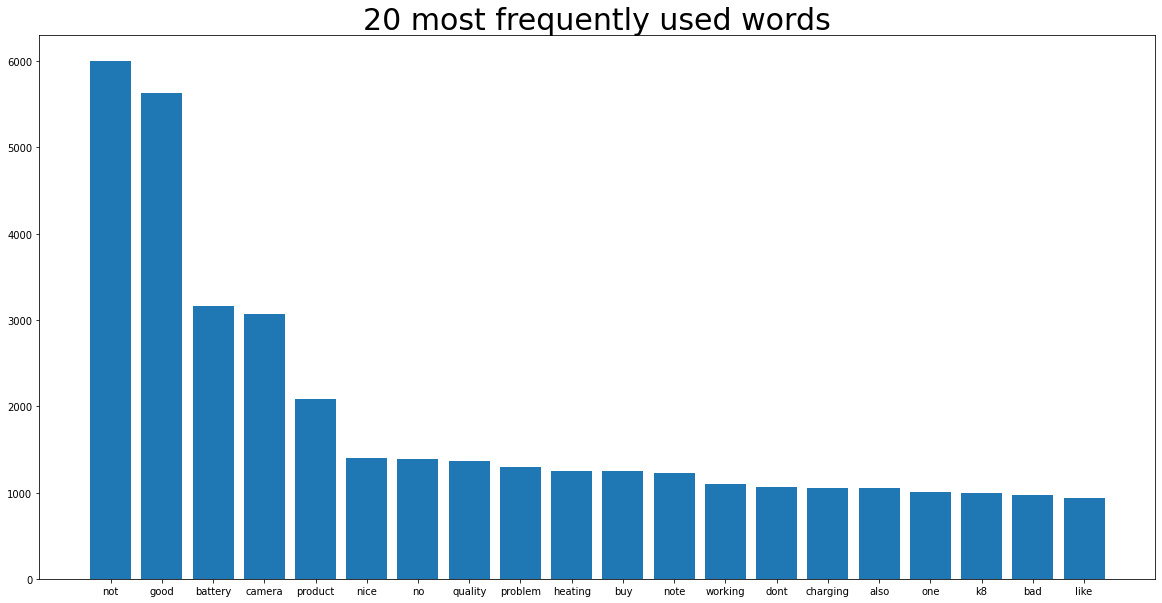

In [36]:
from collections import Counter
word_freq_cnt = Counter(word_list)
# Plotting the most commonly used words:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in word_freq_cnt.most_common(20):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('20 most frequently used words', size=30) 
plt.show()

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently used Nouns')

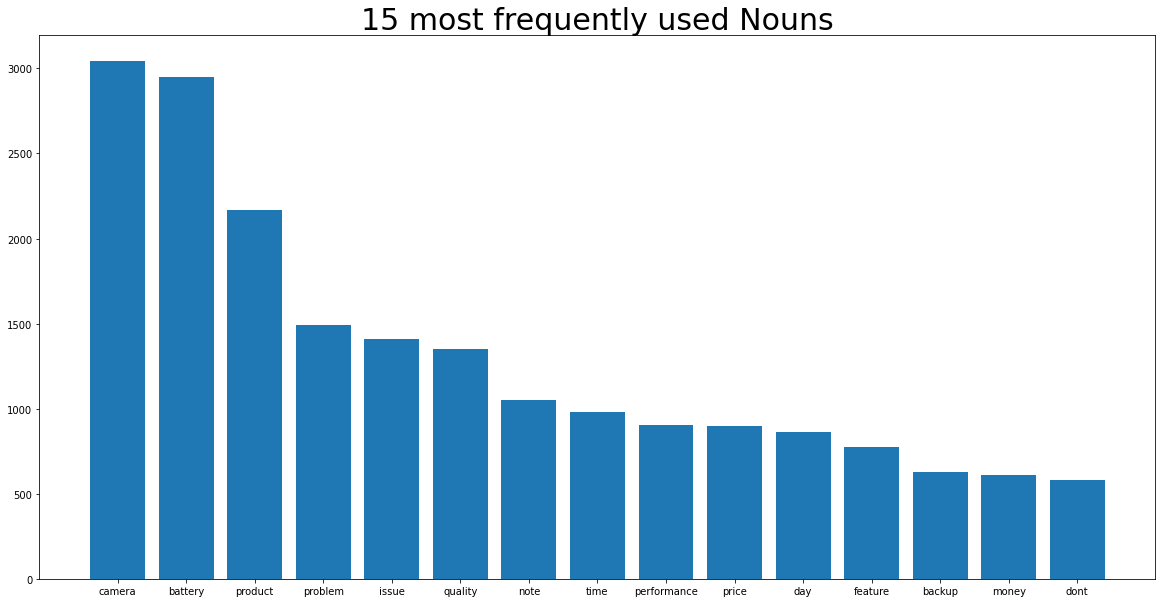

In [37]:
noun_freq_cnt = Counter(nouns_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in noun_freq_cnt.most_common(15):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently used Nouns', size=30) 
plt.show()

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently Verbs')

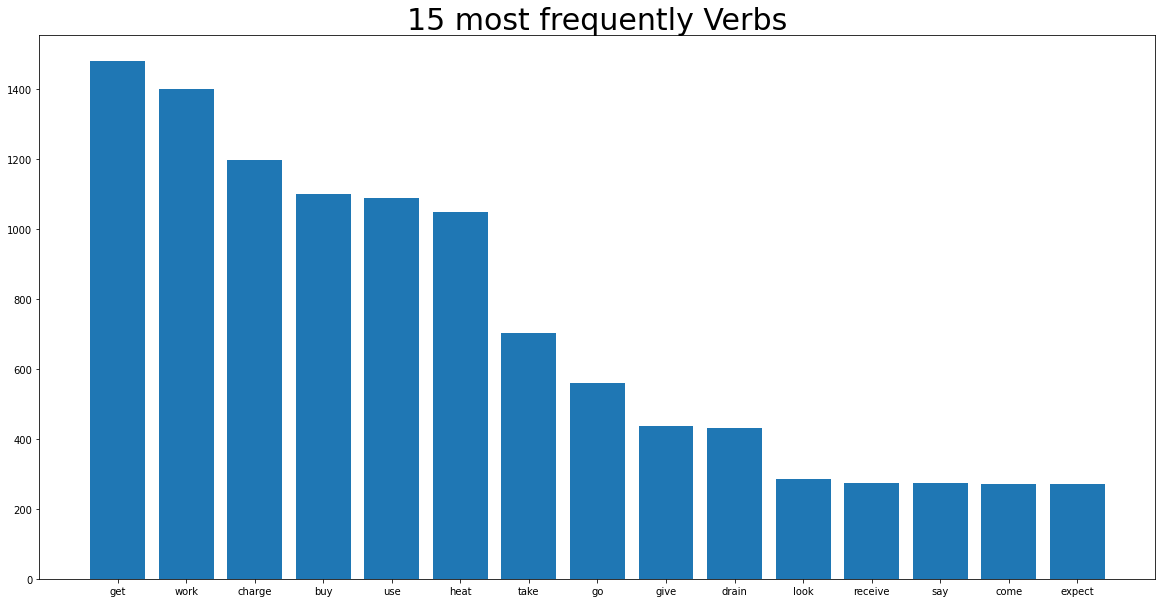

In [38]:
verb_freq_cnt = Counter(verb_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in verb_freq_cnt.most_common(15):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently Verbs', size=30) 
plt.show()

In [41]:
data['review']

0        Good b...
1        Worst ...
2        when I...
3             Good
4        The wo...
           ...    
14670    I real...
14671    The Le...
14672    Awesom...
14673    This p...
14674    Good p...
Name: review, Length: 14667, dtype: object

### 8. Create a topic model using LDA on the cleaned-up data with 12 topics.
    1. Print out the top terms for each topic.
    2. What is the coherence of the model with the c_v metric?

### Linear Dirichlet Allocation(LDA):
LDA is a matrix factorization technique. 
Documents(Reviews) will be represented as document-term matrix.
LDA converts document-term matrix into two lower-dimensional matrix, M1 and M2 where M1 is a document-topic matrix and M2 is a topic-term matrix.It's an iteration process, where each word w of each doc d, word assignment is updated till it reaches a convergence point using Gibs Sampling Technique. 

Assumption: 
It worksubder the assumption each document is generated by a statistical generative process i.e, each document is a mixture of topics and each topic is a mixture of words

Note: 
It is not a determinisitc model. Every time it will endup generating different results for topics

In [43]:
import gensim

# Creating dictionary and applying filter to select few words
dic_res = gensim.corpora.Dictionary(review_lem) #Creates a dictionary for all words in Corpora
dic_res.filter_extremes(no_below = 25, # Keep tokens which are contained in at least no_below documents.
                        no_above = 0.8, # Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
                        keep_n = None) #Keep only the first keep_n most frequent tokens.

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
bow_corpus = [dic_res.doc2bow(doc) for doc in review_lem] 
bow_corpus[0:3] # corpus for input data

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)],
 [(10, 1)]]

In [44]:
print("No of words in dictionary after filtering is: {}".format(len(dic_res)))

No of words in dictionary after filtering is: 384


In [45]:
# Demonstrate how words are connected to numbers in dictionary after filtering
for k, v in dic_res.iteritems():
    if k<10:
        print(k, v) 

0 improvement
1 need
2 update
3 amazon
4 backup
5 battery
6 charger
7 dont
8 hell
9 hour


In [46]:
# Building LDA Model:
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 12,id2word = dic_res, iterations= 5000, passes = 10,workers = 2)

In [47]:
#Evaluation of model using Coherence CV metric:
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model= lda_model,texts= review_lem,dictionary=dic_res,coherence='u_mass')
print('Coherence score with 12 Topics is: ', coherence_model.get_coherence())

Coherence score with 12 Topics is:  -5.731317175075039


In [48]:
# Generating words of  Each topic:
for idx, topic in lda_model.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")      

Topic: 0 
Words: 0.263*"price" + 0.167*"feature" + 0.096*"range" + 0.043*"camera" + 0.038*"smartphone" + 0.035*"quality" + 0.026*"phone" + 0.026*"specification" + 0.021*"gud" + 0.020*"nice"


Topic: 1 
Words: 0.242*"note" + 0.111*"k8" + 0.039*"ram" + 0.032*"super" + 0.026*"memory" + 0.026*"card" + 0.022*"gb" + 0.022*"purchase" + 0.021*"processor" + 0.019*"redmi"


Topic: 2 
Words: 0.119*"time" + 0.090*"heat" + 0.044*"lot" + 0.036*"dolby" + 0.033*"problem" + 0.032*"game" + 0.031*"hang" + 0.028*"headphone" + 0.024*"update" + 0.023*"month"


Topic: 3 
Words: 0.118*"money" + 0.066*"value" + 0.055*"experience" + 0.054*"awesome" + 0.041*"software" + 0.038*"speed" + 0.034*"expectation" + 0.029*"button" + 0.027*"power" + 0.027*"love"


Topic: 4 
Words: 0.553*"product" + 0.086*"performance" + 0.047*"amazon" + 0.022*"dont" + 0.020*"item" + 0.020*"pls" + 0.019*"buy" + 0.015*"r" + 0.012*"return" + 0.012*"cell"


Topic: 5 
Words: 0.101*"service" + 0.065*"day" + 0.055*"delivery" + 0.050*"glass" + 0.

### 9. Analyze the topics through the business lens i.e., determine which of the topics can be combined.

In [49]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic_res)
LDAvis_prepared

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.221702 -0.149619       1        1  12.693978
9     -0.062010 -0.147944       2        1  11.480766
6     -0.212693  0.032849       3        1  11.335507
7      0.056980  0.173183       4        1   9.827817
2     -0.115269  0.089597       5        1   8.446894
...         ...       ...     ...      ...        ...
5     -0.163113 -0.066550       8        1   7.108737
4     -0.099058 -0.255360       9        1   6.358912
3      0.103494  0.231579      10        1   6.100001
0      0.240475 -0.119497      11        1   5.858503
8      0.211148  0.022329      12        1   4.844340

[12 rows x 5 columns], topic_info=        Term       Freq      Total Category  logprob  loglift
37   product  2061.0...  2061.0...  Default  30.0000  30.0000
5    battery  2812.0...  2812.0...  Default  29.0000  29.0000
44    camera  2903.0...  2903.0...  Default  28.0000  28.0000
16      note  1074.0...  1074.0...  Default  27.0000  27.0000
51     price  893.00...  893.00...  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
21      year  24.832898  90.864914  Topic12  -4.7278   1.7302
44    camera  120.63...  2903.9...  Topic12  -3.1472  -0.1537
110     hang  27.718497  187.02...  Topic12  -4.6178   1.1182
266  company  25.621839  128.28...  Topic12  -4.6965   1.4166
63   quality  25.900982  1323.3...  Topic12  -4.6856  -0.9063

[502 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         3  0.377578     amazon
3         6  0.002195     amazon
3         8  0.226108     amazon
3         9  0.377578     amazon
3        10  0.002195     amazon
...     ...       ...        ...
21        7  0.132064       year
21        8  0.264128       year
21       12  0.275134       year
362       7  0.081565  yesterday
362       8  0.870030  yesterday

[1251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 10, 7, 8, 3, 12, 2, 6, 5, 4, 1, 9])

In [50]:
pyLDAvis.save_html(LDAvis_prepared, 'LDA_model_vis'+'.html')

### 10. Create topic model using LDA with the optimal number of topics

In [51]:
def compute_coherence_score(corpus,id2word,k):
    lda_model = gensim.models.LdaMulticore(corpus = corpus, num_topics = k,id2word =dic_res, passes=10, random_state= 1607, iterations= 50, per_word_topics= True)
    coherence_model_lda = CoherenceModel(model= lda_model, texts= review_lem,dictionary= dic_res,coherence='u_mass') 
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

In [52]:
# Find the number of topic for which the coherence score is highest
# cs is empty list which captures the number of topics and their corresponding score as a tuple.
cs=[]
for i in range(4,11):
    score = compute_coherence_score(corpus=bow_corpus,id2word=dic_res,k=i) 
    print('\nCoherence score with ', i, 'Topics is: ', score ) 
    cs.append((i,score))


Coherence score with  4 Topics is:  -3.8913127466580795

Coherence score with  5 Topics is:  -4.003949871961652

Coherence score with  6 Topics is:  -4.132540896640219

Coherence score with  7 Topics is:  -4.462249115997893

Coherence score with  8 Topics is:  -4.593750394584742

Coherence score with  9 Topics is:  -4.603539047303212

Coherence score with  10 Topics is:  -5.168507057345667


/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Text(0.5, 1.0, 'Coherence Score vs  Number of Topics')

Text(0.5, 0, 'Number of Topics')

Text(0, 0.5, 'Coherence Score')

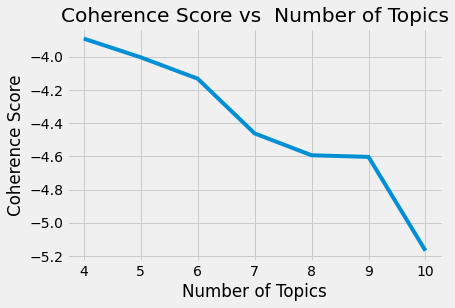

In [53]:
# Plot the distribution of score for topics
x = [val[0] for val in cs]
y= [val[1] for val in cs]
plt.plot(x,y)
plt.title('Coherence Score vs  Number of Topics') 
plt.grid(True)
plt.xlabel('Number of Topics') 
plt.ylabel('Coherence Score') 
plt.show()

### u_mass Coherence score  lies between -14 to 14 typically and close to zero is considered as better. Hence, we can go ahead with 4 topics.

## <span style="color:crimson;"> Alert: </span> 
### As LDA is a non determistic model like human brains 😛, everytime you may end up with different no. of optimal topics!

In [54]:
from operator import itemgetter
tps = max(cs, key=itemgetter(1))[0]
print('Optimum number of topics for highest Coherence score is: ', tps)

Optimum number of topics for highest Coherence score is:  4


### 11. The business should be able to interpret the topics

In [55]:
# Building the final LDA model using the optimum number of topics
# Here we have tuned few hyperparamaters for better accuracy of the model.
lda_model_final = gensim.models.LdaMulticore(corpus = bow_corpus, num_topics = tps,id2word = dic_res, passes=10,random_state = 1607, iterations= 50, per_word_topics = True)
coherence_model_lda_final = CoherenceModel(model= lda_model_final, texts= review_lem,dictionary= dic_res,coherence='u_mass') 
coherence_score_final = coherence_model_lda_final.get_coherence()
print('Coherence score for ',tps,' Topics is: ', coherence_score_final)

Coherence score for  4  Topics is:  -3.8193270777567907


In [56]:
# Generating words of  Each topic:
for idx, topic in lda_model_final.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")     

Topic: 0 
Words: 0.145*"product" + 0.137*"camera" + 0.047*"performance" + 0.046*"quality" + 0.027*"price" + 0.019*"range" + 0.015*"glass" + 0.013*"awesome" + 0.012*"display" + 0.011*"budget"


Topic: 1 
Words: 0.054*"feature" + 0.049*"money" + 0.041*"price" + 0.035*"screen" + 0.031*"buy" + 0.028*"dont" + 0.023*"waste" + 0.020*"return" + 0.019*"value" + 0.017*"option"


Topic: 2 
Words: 0.120*"battery" + 0.060*"camera" + 0.042*"note" + 0.033*"quality" + 0.032*"day" + 0.030*"backup" + 0.026*"hour" + 0.023*"time" + 0.022*"service" + 0.019*"amazon"


Topic: 3 
Words: 0.103*"problem" + 0.096*"issue" + 0.046*"battery" + 0.038*"network" + 0.033*"month" + 0.032*"heating" + 0.031*"time" + 0.026*"charger" + 0.024*"heat" + 0.017*"charge"




In [57]:
topic_words = {}

for idx, topic in lda_model_final.print_topics(-1): 
    temp = []
    for item in topic.split('+'):
        item_alpha = [letter for letter in item if letter.isalpha()]
        temp.append("".join(item_alpha))    
    topic_words[('Topic_'+str(idx+1))] = temp

topic_table = pd.DataFrame(topic_words)    
topic_table.index = ['Word_'+str(i+1) for i in range(topic_table.shape[0])]
topic_table

,Topic_1,Topic_2,Topic_3,Topic_4
Word_1,product,feature,battery,problem
Word_2,camera,money,camera,issue
Word_3,perfor...,price,note,battery
Word_4,quality,screen,quality,network
Word_5,price,buy,day,month
Word_6,range,dont,backup,heating
Word_7,glass,waste,hour,time
Word_8,awesome,return,time,charger
Word_9,display,value,service,heat
Word_10,budget,option,amazon,charge


In [58]:
x = lda_model_final.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

for topic, words in topics_words:
    print(str(topic)+"::"+str(words))
    
print()

0::['product', 'camera', 'performance', 'quality', 'price', 'range', 'glass', 'awesome', 'display', 'budget']
1::['feature', 'money', 'price', 'screen', 'buy', 'dont', 'waste', 'return', 'value', 'option']
2::['battery', 'camera', 'note', 'quality', 'day', 'backup', 'hour', 'time', 'service', 'amazon']
3::['problem', 'issue', 'battery', 'network', 'month', 'heating', 'time', 'charger', 'heat', 'charge']



### 12. Visualize the topics

In [59]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_final, bow_corpus, dic_res)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.031341  0.082802       1        1  30.632534
0     -0.218510  0.133822       2        1  24.138968
3      0.259997  0.032660       3        1  23.942317
1     -0.072828 -0.249284       4        1  21.286181, topic_info=       Term       Freq      Total Category  logprob  loglift
37  product  2096.0...  2096.0...  Default  30.0000  30.0000
44   camera  3028.0...  3028.0...  Default  29.0000  29.0000
11  problem  1454.0...  1454.0...  Default  28.0000  28.0000
54    issue  1371.0...  1371.0...  Default  27.0000  27.0000
5   battery  2878.0...  2878.0...  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
65     work  134.01...  321.24...   Topic4  -4.5222   0.6729
16     note  192.83...  1027.2...   Topic4  -4.1583  -0.1257
15       k8  133.69...  478.82...   Topic4  -4.5246   0.2714
47   doesnt  109.28...  303.11...   Topic4  -4.7262   0.5270
62      day  106.26...  865.86...   Topic4  -4.7542  -0.5506

[233 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3         1  0.706342  amazon
3         2  0.118075  amazon
3         3  0.094882  amazon
3         4  0.080122  amazon
286       1  0.244763     app
...     ...       ...     ...
65        2  0.127629    work
65        3  0.242806    work
65        4  0.417129    work
237       2  0.074164   worth
237       4  0.919628   worth

[524 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

<Figure size 1440x2880 with 0 Axes>

/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:5

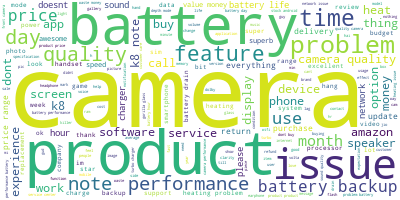

<Figure size 1440x2880 with 0 Axes>

In [60]:
# Word Cloud to understand what topics are discussed in general
from wordcloud import WordCloud # Import the wordcloud library
long_string = ','.join(nouns_list) # Join the different processed titles together.
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue') # Create a WordCloud object
plt.figure(figsize=[20,40])
wordcloud.generate(long_string) # Generate a word cloud
wordcloud.to_image()# Visualize the word cloud

In [61]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dic_res,
                                           num_topics=tps, 
                                           random_state=1607,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11184 samples in 0.007s...
[t-SNE] Computed neighbors for 11184 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11184
[t-SNE] Computed conditional probabilities for sample 2000 / 11184
[t-SNE] Computed conditional probabilities for sample 3000 / 11184
[t-SNE] Computed conditional probabilities for sample 4000 / 11184
[t-SNE] Computed conditional probabilities for sample 5000 / 11184
[t-SNE] Computed conditional probabilities for sample 6000 / 11184
[t-SNE] Computed conditional probabilities for sample 7000 / 11184
[t-SNE] Computed conditional probabilities for sample 8000 / 11184
[t-SNE] Computed conditional probabilities for sample 9000 / 11184
[t-SNE] Computed conditional probabilities for sample 10000 / 11184
[t-SNE] Computed conditional probabilities for sample 11000 / 11184
[t-SNE] Computed conditional probabilities for sample 11184 / 11184
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence

Loading BokehJS ...

In [62]:
import matplotlib.colors as mcolors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(tps), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

GlyphRenderer(id='1040', ...)

## <span style="color:blue;"> If you find this notebook useful, Don't forget to comment and upvote. Your opinion matters :) </span>